In [ ]:
#  Reward function shaping in this script
#  TODO extend for the discrete case also. Right now, discrete uses only sparse rewards

In [1]:
import pandas as pd
import numpy as np
import cPickle as pickle

In [2]:
df_train = pd.read_csv('../data/rl_train_set_scaled.csv')
df_val =  pd.read_csv('..data/rl_val_set_scaled.csv')
df_test = pd.read_csv('../data/rl_val_set_scaled.csv')

In [ ]:
df_train_disc = pd.read_csv('../data/rl_train_data_discrete.csv')
df_val_disc = pd.read_csv('../data/rl_val_data_discrete.csv')
df_test_disc = pd.read_csv('../data/rl_test_data_discrete.csv')

In [4]:
df_train.head()

,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,died_in_hosp,mortality_90d,Weight_kg,...,max_dose_vaso,input_total_tev,input_4hourly_tev,output_total,output_4hourly,cumulated_balance_tev,vaso_input,iv_input,reward,actual_action
0,1,3,7245052800,-0.5,-0.972456,-1.807766,-0.5,0,1,-0.230659,...,-0.379552,0.133952,1.254772,-0.380319,0.423948,0.090690,0.0,4.0,0,20
1,2,3,7245067200,-0.5,-0.972456,-1.807766,-0.5,0,1,-0.230659,...,-0.379552,0.319865,1.240192,-0.040929,0.646407,0.317665,0.0,4.0,0,20
2,3,3,7245081600,-0.5,-0.972456,-1.807766,-0.5,0,1,-0.230659,...,-0.379552,0.327648,0.368842,0.324865,1.034249,0.095431,0.0,2.0,0,10
3,4,3,7245096000,-0.5,-0.972456,-1.807766,-0.5,0,1,-0.230659,...,-0.379552,0.332030,0.203508,0.397886,0.735431,0.012464,0.0,2.0,0,10
4,5,3,7245110400,-0.5,-0.972456,-1.807766,-0.5,0,1,-0.230659,...,-0.379552,0.336366,0.203508,0.439922,0.620478,-0.042354,0.0,2.0,0,10


In [5]:
len(df_train)

193654

In [6]:
df_test.head()

,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,died_in_hosp,mortality_90d,Weight_kg,...,max_dose_vaso,input_total_tev,input_4hourly_tev,output_total,output_4hourly,cumulated_balance_tev,vaso_input,iv_input,reward,actual_action
0,1,14,4264269300,-0.5,1.190578,-0.875816,-0.5,0,1,-1.071284,...,-0.379552,-0.273577,1.112914,-0.260681,0.309985,-0.251550,0.0,4.0,0,20
1,2,14,4264283700,-0.5,1.190578,-0.875816,-0.5,0,1,-0.840103,...,-0.379552,-0.183027,0.698303,-0.094558,0.443790,-0.240439,0.0,3.0,0,15
2,3,14,4264298100,-0.5,1.190578,-0.875816,-0.5,0,1,-0.608922,...,-0.379552,-0.108854,0.698303,-0.001038,0.393879,-0.223993,0.0,3.0,0,15
3,4,14,4264312500,-0.5,1.190578,-0.875816,-0.5,0,1,-0.377741,...,-0.379552,-0.076245,0.493349,0.033562,0.146330,-0.214363,0.0,2.0,0,10
4,5,14,4264326900,-0.5,1.190578,-0.875816,-0.5,0,1,-0.146560,...,-0.379552,-0.076245,-1.689325,0.033562,-2.008267,-0.214363,0.0,0.0,0,0


In [8]:
# Smaller rewards to improve stability in continuous models
df_train.loc[df_train['reward'] > 15,'reward'] = 15
df_train.loc[df_train['reward'] < -15,'reward'] = -15

df_val.loc[df_val['reward'] > 15,'reward'] = 15
df_val.loc[df_val['reward'] < -15,'reward'] = -15

df_test.loc[df_test['reward'] > 15,'reward'] = 15
df_test.loc[df_test['reward'] < -15,'reward'] = -15

In [ ]:
# Similar process in discrete models to facilitate comparisons
df_train_disc.loc[df_train_disc['reward'] > 15,'reward'] = 15
df_train_disc.loc[df_train_disc['reward'] < -15,'reward'] = -15

df_val_disc.loc[df_val_disc['reward'] > 15,'reward'] = 15
df_val_disc.loc[df_val_disc['reward'] < -15,'reward'] = -15

df_test_disc.loc[df_test_disc['reward'] > 15,'reward'] = 15
df_test_disc.loc[df_test_disc['reward'] < -15,'reward'] = -15

In [14]:
orig_df = pd.read_csv('../data/MKdataset07Feb17.csv')

In [15]:
# lactate - target is 0.5 to 1 mmol/l
# SOFA - 0
#  GCS - 0
#  mechvent = 0
# MAP is normally between 65 and 110 mmHg

In [16]:
# s1 = orig_df['SOFA'].values
# s2 = orig_df['SOFA'].values
# s2 = np.insert(s2,0,9)
# s2 = np.delete(s2, -1)
# print len(s1), len(s2)

In [17]:
# pd.Series(s2-s1).hist(bins=100)

In [18]:
# l1 = orig_df['Arterial_lactate'].values
# l2 = orig_df['Arterial_lactate'].values
# l2 = np.insert(l2,0,9)
# l2 = np.delete(l2, -1)
# print len(l1), len(l2)

In [19]:
c0 = -0.1/4
c1 = -0.5/4
c2 = -2

In [15]:
# c0 = -0.1/2
# c1 = -0.5/2
# c2 = -2

In [20]:
# add rewards
orig_df['shaped_reward'] = 0
for i in orig_df.index:
    if i == 0:
        continue
    if orig_df.ix[i, 'icustayid'] == orig_df.ix[i-1, 'icustayid']:
        sofa_cur = orig_df.ix[i,'SOFA']
        sofa_prev = orig_df.ix[i-1,'SOFA']
        lact_cur = orig_df.ix[i,'Arterial_lactate']
        lact_prev = orig_df.ix[i-1,'Arterial_lactate']
        reward = 0
        if sofa_cur == sofa_prev and sofa_cur != 0:
            reward += c0
        reward += c1*(sofa_cur-sofa_prev)
        reward += c2*np.tanh(lact_cur - lact_prev)
        orig_df.ix[i,'shaped_reward'] = reward

# if orig_df.ix[len(orig_df)-1, 'died_in_hosp'] == 1:
#     orig_df.ix[len(orig_df)-1, 'shaped_reward'] = -100
# elif orig_df.ix[len(orig_df)-1, 'died_in_hosp'] == 0:
#      orig_df.ix[len(orig_df)-1, 'shaped_reward'] = 100
print orig_df['shaped_reward'].value_counts()

-0.025000    26568
 0.000000    18459
 0.125000     8824
-0.125000     8061
 0.250000     3221
-0.250000     2777
 0.375000     2112
 0.500000     1953
-0.375000     1431
-0.500000      966
 0.625000      511
-0.224336      448
 0.174336      441
-0.064995      426
-0.124917      412
 0.074917      374
 0.054957      353
 0.014995      314
-0.625000      293
-0.074990      249
 0.041642      237
 0.024990      230
-0.091642      230
-0.104957      229
-0.000001      218
 0.174336      192
 0.324336      184
-0.322770      181
-0.419751      180
-0.124917      179
             ...  
-0.701795        1
-0.093574        1
-0.346439        1
-1.939272        1
-0.252826        1
-0.017391        1
-0.084242        1
 0.047695        1
-1.381106        1
 0.206888        1
-0.101001        1
 0.063830        1
 0.327009        1
-0.004334        1
-0.154410        1
 0.330563        1
 0.964818        1
 2.117960        1
 1.840352        1
 0.037095        1
 1.629468        1
 2.241509   

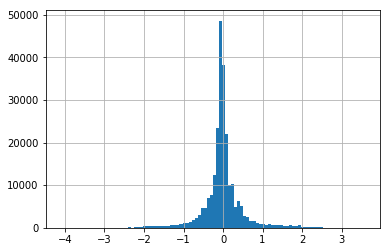

In [21]:
%matplotlib inline
orig_df['shaped_reward'].hist(bins=100)

In [22]:
train_ids = df_train['icustayid'].unique()
val_ids = df_val['icustayid'].unique()
test_ids = df_test['icustayid'].unique()

In [23]:
train_rewards = orig_df.loc[orig_df['icustayid'].isin(train_ids)]['shaped_reward']

In [24]:
len(train_rewards)

193654

In [25]:
train_rewards.tail()

242432    0.164338
242433   -0.110662
242434   -0.110662
242435    0.039338
242436   -0.110662
Name: shaped_reward, dtype: float64

In [ ]:
# check this works as expected
val_rewards = orig_df.loc[orig_df['icustayid'].isin(val_ids)]['shaped_reward']

In [26]:
test_rewards = orig_df.loc[orig_df['icustayid'].isin(test_ids)]['shaped_reward']

In [27]:
len(test_rewards)

48796

In [28]:
193646 +48796

242442

In [29]:
df_train.tail()

,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,died_in_hosp,mortality_90d,Weight_kg,...,max_dose_vaso,input_total_tev,input_4hourly_tev,output_total,output_4hourly,cumulated_balance_tev,vaso_input,iv_input,reward,actual_action
193649,16,99994,4574226420,0.5,0.567459,0.988084,0.5,0,0,0.030161,...,-0.379552,0.858052,-0.120501,-2.750597,-2.008267,2.619295,0.0,1.0,0,5
193650,17,99994,4574240820,0.5,0.567459,0.988084,0.5,0,0,0.030161,...,-0.379552,0.858558,-0.054785,-2.750597,-2.008267,2.622999,0.0,1.0,0,5
193651,18,99994,4574255220,0.5,0.567459,0.988084,0.5,0,0,0.030161,...,-0.379552,0.858962,-0.120501,-2.750597,-2.008267,2.625962,0.0,1.0,0,5
193652,19,99994,4574269620,0.5,0.567459,0.988084,0.5,0,0,0.030161,...,-0.379552,0.859366,-0.120501,-2.750597,-2.008267,2.628925,0.0,1.0,0,5
193653,20,99994,4574284020,0.5,0.567459,0.988084,0.5,0,0,0.030161,...,-0.379552,0.859769,-0.120501,-2.750597,-2.008267,2.631889,0.0,1.0,15,5


In [30]:
len(orig_df['shaped_reward'])

242450

In [31]:
len(df_train)

193654

In [32]:
# check that this sums to the total number of data items -- needs to be re-run
len(df_train) + len(df_test) len(df_val)

242450

In [33]:
df_train['reward'] += np.array(train_rewards)
df_val['reward'] += np.array(val_rewards)
df_test['reward'] += np.array(test_rewards)

In [ ]:
df_train_disc['reward'] += np.array(train_rewards)
df_val_disc['reward'] += np.array(val_rewards)
df_test_disc['reward'] += np.array(test_rewards)

In [ ]:
df_train.to_csv('../data/rl_train_data_final_cont.csv',index=False)
df_val.to_csv('../data/rl_val_data_final_cont.csv', index=False)
df_test.to_csv('../data/rl_test_data_final_cont.csv',index=False)

In [ ]:
df_train_disc.to_csv('../data/rl_train_data_final_disc.csv',index=False)
df_val_disc.to_csv('../data/rl_val_data_final_disc.csv', index=False)
df_test_disc.to_csv('../data/rl_test_data_final_disc.csv',index=False)

In [68]:
train_rewards.head(n=20)

0     0.000000
1     0.125000
2     0.657321
3     1.367788
4     1.199099
5     1.057596
6    -0.625000
7     0.432822
8     1.905144
9    -0.375000
10    0.054957
11    0.054957
12    0.054957
13    0.054957
24    0.000000
25    1.917545
26    1.780066
27    0.557625
28    0.797751
29    0.575874
Name: shaped_reward, dtype: float64

In [67]:
df_train['reward'].head(n=20)

0      0.000000
1      0.125000
2      0.657321
3      1.367788
4      1.199099
5      1.057596
6     -0.625000
7      0.432822
8      1.905144
9     -0.375000
10     0.054957
11     0.054957
12     0.054957
13    15.054957
14     0.000000
15     1.917545
16     1.780066
17     0.557625
18     0.797751
19     0.575874
Name: reward, dtype: float64